# Final project: Meta Aggregation #

### by: Ortal & Raz & Michal
### guidence: Hila

In [ ]:
pip install scikit-multilearn

In [ ]:
pip install shap

In [ ]:
pip install interpret

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from skmultilearn.problem_transform import ClassifierChain
from sklearn.model_selection import train_test_split
from GetProcessedData import get_question_dfs
from AggregationMethods.ConfidenceMethods import highest_average_confidence
from AggregationMethods.SurprisinglyPopular import surprisingly_pop_answer
from AggregationMethods.MajorityRule import majority_answer
from FeaturesExtraction.AnswerFeatures import AnswerF
from FeaturesExtraction.AnswerFeaturesSubgroups import AnswerSubF
from FeaturesExtraction.ConfidenceFeatures import ConfidenceF
from FeaturesExtraction.ConfidenceFeaturesSubgroups import ConfidenceSubF
from FeaturesExtraction.PredictionFeatures import PredictionsF
import Pipeline.MultiLabelPipeline as MLpip

In [2]:
#libraries
import sys
import os

module_path = os.path.abspath(os.path.join(os.pardir, os.pardir))
if module_path not in sys.path:
    sys.path.append(module_path)

# from ProjectFramework.GetProcessedData import get_question_dfs
# from ProjectFramework.Pipeline.MultiLabelPipeline import create_data_df

#import ProjectFramework.Pipeline.MultiLabelPipeline.MultiLabelPipeline.create_data_df
import numpy as np 
import pandas as pd 
import os
import json 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
import shap

In [3]:
RF = RandomForestClassifier(random_state=0)  #has no predict_proba option
LR = LogisticRegression(solver = 'liblinear')
GNB = GaussianNB()
SVC = LinearSVC(random_state=0)
DT = DecisionTreeClassifier(random_state=0) 
BNB = BernoulliNB()
SGD = SGDClassifier()  #has no predict_proba option

In [6]:
# get compleate data frame with features:

DATA = MLpip.get_data()
LABELS = MLpip.get_label_names()

y = DATA[LABELS]
x = DATA.drop(LABELS,axis='columns', inplace=False)

In [7]:
Accuracy = {}

In [8]:
DATA.shape

(1284, 46)

## classifier_chain

In [ ]:
# split data into train and test using leave one out validation
results_c_rf = {}
results_c_lr = {}
results_c_gnb = {}
results_c_dt = {}
results_c_bnb = {}
results_c_sgd = {}

# res = []
loo = LeaveOneOut()
loo.get_n_splits(x)

for train_index, test_index in loo.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    # print(X_train, X_test, y_train, y_test)
    ## HERE - run moddels
    
#     clf_chain_RF = MLpip.classifier_chain(x_train, y_train, RandomForestClassifier(random_state=0))
#     results_c_rf.update(MLpip.get_chain_model_results(clf_chain_RF, x_test))

    clf_chain_LR = MLpip.classifier_chain(x_train, y_train,LogisticRegression(solver = 'liblinear',max_iter=10000))
    results_c_lr.update(MLpip.get_chain_model_results(clf_chain_LR, x_test))

    clf_chain_GNB = MLpip.classifier_chain(x_train, y_train, GaussianNB())
    results_c_gnb.update(MLpip.get_chain_model_results(clf_chain_GNB, x_test))

    clf_chain_DT = MLpip.classifier_chain(x_train, y_train, DecisionTreeClassifier(random_state=0))
    results_c_dt.update(MLpip.get_chain_model_results(clf_chain_DT, x_test))

    clf_chain_BNB = MLpip.classifier_chain(x_train, y_train, BernoulliNB())
    results_c_bnb.update(MLpip.get_chain_model_results(clf_chain_BNB, x_test))

#     clf_chain_SGD = MLpip.classifier_chain(x_train, y_train, SGDClassifier())
#     results_c_sgd.update(MLpip.get_chain_model_results(clf_chain_SGD, x_test))


# Accuracy['c_RF'] = MLpip.get_accuracy(results_c_rf, y) #no proba
Accuracy['c_LR'] = MLpip.get_accuracy(results_c_lr, y)
Accuracy['c_GNB'] = MLpip.get_accuracy(results_c_gnb, y)   
Accuracy['c_DT'] = MLpip.get_accuracy(results_c_dt, y)    
Accuracy['c_BNB'] = MLpip.get_accuracy(results_c_bnb, y) 
# Accuracy['c_SGD'] = MLpip.get_accuracy(results_c_sgd, y) #no proba


In [ ]:
Accuracy

## binary_relevance

In [ ]:
# split data into train and test using leave one out validation
results_b_rf = {}
results_b_lr = {}
results_b_gnb = {}
results_b_dt = {}
results_b_bnb = {}
results_b_sgd = {}

# res = []
loo = LeaveOneOut()
loo.get_n_splits(x)

for train_index, test_index in loo.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    # print(X_train, X_test, y_train, y_test)
    ## HERE - run moddels
    
#     clf_chain_RF = MLpip.binary_relevance(x_train, y_train, RandomForestClassifier(random_state=0))
#     results_b_rf.update(MLpip.get_binary_model_results(clf_chain_RF, x_test))

    clf_chain_LR = MLpip.binary_relevance(x_train, y_train,LogisticRegression(solver = 'liblinear',max_iter=10000))
    results_b_lr.update(MLpip.get_binary_model_results(clf_chain_LR, x_test))

    clf_chain_GNB = MLpip.binary_relevance(x_train, y_train, GaussianNB())
    results_b_gnb.update(MLpip.get_binary_model_results(clf_chain_GNB, x_test))

    clf_chain_DT = MLpip.binary_relevance(x_train, y_train, DecisionTreeClassifier(random_state=0))
    results_b_dt.update(MLpip.get_binary_model_results(clf_chain_DT, x_test))

    clf_chain_BNB = MLpip.binary_relevance(x_train, y_train, BernoulliNB())
    results_b_bnb.update(MLpip.get_binary_model_results(clf_chain_BNB, x_test))

#     clf_chain_SGD = MLpip.binary_relevance(x_train, y_train, SGDClassifier())
#     results_b_sgd.update(MLpip.get_binary_model_results(clf_chain_SGD, x_test))

# Accuracy['b_RF'] = MLpip.get_accuracy(results_b_rf, y)
Accuracy['b_LR'] = MLpip.get_accuracy(results_b_lr, y)
Accuracy['b_GNB'] = MLpip.get_accuracy(results_b_gnb, y)   
Accuracy['b_DT'] = MLpip.get_accuracy(results_b_dt, y)    
Accuracy['b_BNB'] = MLpip.get_accuracy(results_b_bnb, y) 
# Accuracy['b_SGD'] = MLpip.get_accuracy(results_b_sgd, y)


In [ ]:
Accuracy

## label_powerset

In [ ]:
# split data into train and test using leave one out validation
results_p_rf = {}
results_p_lr = {}
results_p_gnb = {}
results_p_dt = {}
results_p_bnb = {}
results_p_sgd = {}

# res = []
loo = LeaveOneOut()
loo.get_n_splits(x)

for train_index, test_index in loo.split(x):
    # print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    # print(X_train, X_test, y_train, y_test)
    ## HERE - run moddels
    
#     clf_chain_RF = MLpip.label_powerset(x_train, y_train, RandomForestClassifier(random_state=0))
#     results_p_rf.update(MLpip.get_binary_model_results(clf_chain_RF, x_test))

    clf_chain_LR = MLpip.label_powerset(x_train, y_train,LogisticRegression(solver = 'liblinear',max_iter=10000))
    results_p_lr.update(MLpip.get_binary_model_results(clf_chain_LR, x_test))

    clf_chain_GNB = MLpip.label_powerset(x_train, y_train, GaussianNB())
    results_p_gnb.update(MLpip.get_binary_model_results(clf_chain_GNB, x_test))

    clf_chain_DT = MLpip.label_powerset(x_train, y_train, DecisionTreeClassifier(random_state=0))
    results_p_dt.update(MLpip.get_binary_model_results(clf_chain_DT, x_test))

    clf_chain_BNB = MLpip.label_powerset(x_train, y_train, BernoulliNB())
    results_p_bnb.update(MLpip.get_binary_model_results(clf_chain_BNB, x_test))

#     clf_chain_SGD = MLpip.label_powerset(x_train, y_train, SGDClassifier())
#     results_p_sgd.update(MLpip.get_binary_model_results(clf_chain_SGD, x_test))

# Accuracy['p_RF'] = MLpip.get_accuracy(results_p_rf, y)
Accuracy['p_LR'] = MLpip.get_accuracy(results_p_lr, y)
Accuracy['p_GNB'] = MLpip.get_accuracy(results_p_gnb, y)   
Accuracy['p_DT'] = MLpip.get_accuracy(results_p_dt, y)    
Accuracy['p_BNB'] = MLpip.get_accuracy(results_p_bnb, y) 
# Accuracy['p_SGD'] = MLpip.get_accuracy(results_p_sgd, y)


In [ ]:
Accuracy

In [ ]:
# from sklearn.metrics import hamming_loss, accuracy_score 

# print("accuracy_score:", accuracy_score(y, res))
# print("Hamming_loss:", hamming_loss(y, res))

## K-fold implementation

In [94]:
# split data into train and test using k-fold cross validation

results_k_b_rf = {}
results_k_b_lr = {}
results_k_b_gnb = {}
results_k_b_dt = {}
results_k_b_bnb = {}
results_k_b_sgd = {}

kf = KFold(n_splits=3, random_state=None, shuffle=False) # Define the split - into 2 folds 
kf.get_n_splits(x) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(x):
    # print(“TRAIN:”, train_index, “TEST:”, test_index)
    x_train, x_test = x.loc[train_index], x.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    ## HERE - run moddels
    clf_chain_RF = MLpip.binary_relevance(x_train, y_train, RandomForestClassifier())
    results_k_b_rf.update(MLpip.get_binary_model_results(clf_chain_RF, x_test))

    clf_chain_LR = MLpip.binary_relevance(x_train, y_train,LogisticRegression(solver = 'liblinear',max_iter=10000))
    results_k_b_lr.update(MLpip.get_binary_model_results(clf_chain_LR, x_test))

    clf_chain_GNB = MLpip.binary_relevance(x_train, y_train, GaussianNB())
    results_k_b_gnb.update(MLpip.get_binary_model_results(clf_chain_GNB, x_test))

    clf_chain_DT = MLpip.binary_relevance(x_train, y_train, DecisionTreeClassifier(random_state=0))
    results_k_b_dt.update(MLpip.get_binary_model_results(clf_chain_DT, x_test))

    clf_chain_BNB = MLpip.binary_relevance(x_train, y_train, BernoulliNB())
    results_k_b_bnb.update(MLpip.get_binary_model_results(clf_chain_BNB, x_test))

#     clf_chain_SGD = MLpip.binary_relevance(x_train, y_train, SGDClassifier())
#     results_k_b_sgd.update(MLpip.get_binary_model_results(clf_chain_SGD, x_test))

Accuracy['k_b_RF'] = MLpip.get_accuracy(results_k_b_rf, y)
Accuracy['k_b_LR'] = MLpip.get_accuracy(results_k_b_lr, y)
Accuracy['k_b_GNB'] = MLpip.get_accuracy(results_k_b_gnb, y)   
Accuracy['k_b_DT'] = MLpip.get_accuracy(results_k_b_dt, y)    
Accuracy['k_b_BNB'] = MLpip.get_accuracy(results_k_b_bnb, y) 
# Accuracy['k_b_SGD'] = MLpip.get_accuracy(results_k_b_sgd, y)


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


In [95]:
Accuracy

{'k_b_LR': 0.7095015576323987,
 'k_b_GNB': 0.7017133956386293,
 'b_RF': 0.7172897196261683,
 'b_LR': 0.7095015576323987,
 'b_GNB': 0.7017133956386293,
 'b_DT': 0.5911214953271028,
 'b_BNB': 0.6838006230529595}

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Perform k-fold cross validation
k = 10
scores = cross_val_score(model, x, y, cv=k)
print “Cross-validated scores:”, scores
    
# Make cross validated predictions
predictions = cross_val_predict(model, df, y, cv=k)
plt.scatter(y, predictions)

## present accuracy

In [ ]:
Accuracy

## shap feature evaluation

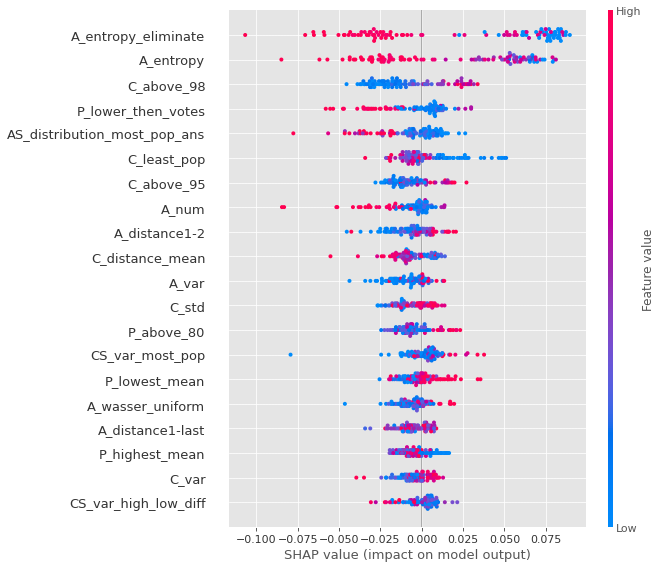

In [105]:
#Random Forest Model
rfc=RandomForestClassifier()
model_2=rfc.fit(x_train,y_train['MR'])
rfc_predict=model_2.predict(x_test)

# load JS vis
shap.initjs() 

# create a tree explainer for Random Forest
explainer = shap.TreeExplainer(model_2)

#sample 100 observations from the test data
observations = x_test.sample(100, random_state=42)

#create an explainer
shap_values = explainer.shap_values(observations)

#generate a summary plot
shap.summary_plot(shap_values[1], features=observations)

In [106]:
import sklearn

# a classic housing price dataset
X100 = shap.utils.sample(x_test, 100) # 100 instances for use as the background distribution

# a simple linear model
#model = sklearn.linear_model.LinearRegression()
model = GaussianNB()
model.fit(x_test, y_test['MR'])

explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(x_test)

#shap.plots.waterfall(shap_values[18], max_display=14)

Permutation explainer: 429it [00:41,  7.80it/s]                                                                        


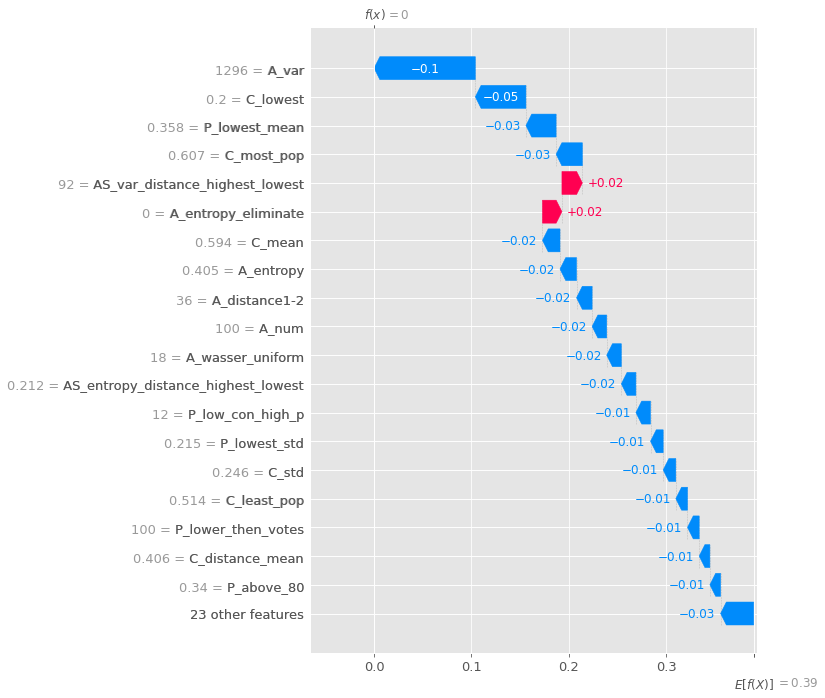

In [108]:
shap.plots.waterfall(shap_values[18], max_display=20)

Permutation explainer: 429it [04:46,  1.43it/s]                                                                        


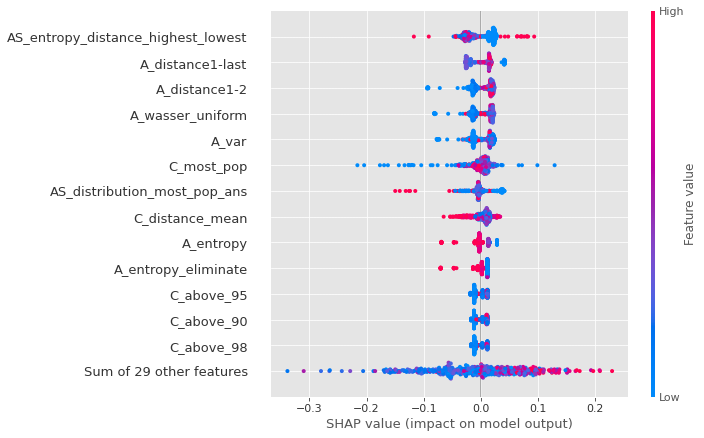

In [86]:
# fit a GAM model to the data
import interpret
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(x_test, y_test['MR'])

# explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(x_test)

shap.plots.beeswarm(shap_values_ebm, max_display=40)

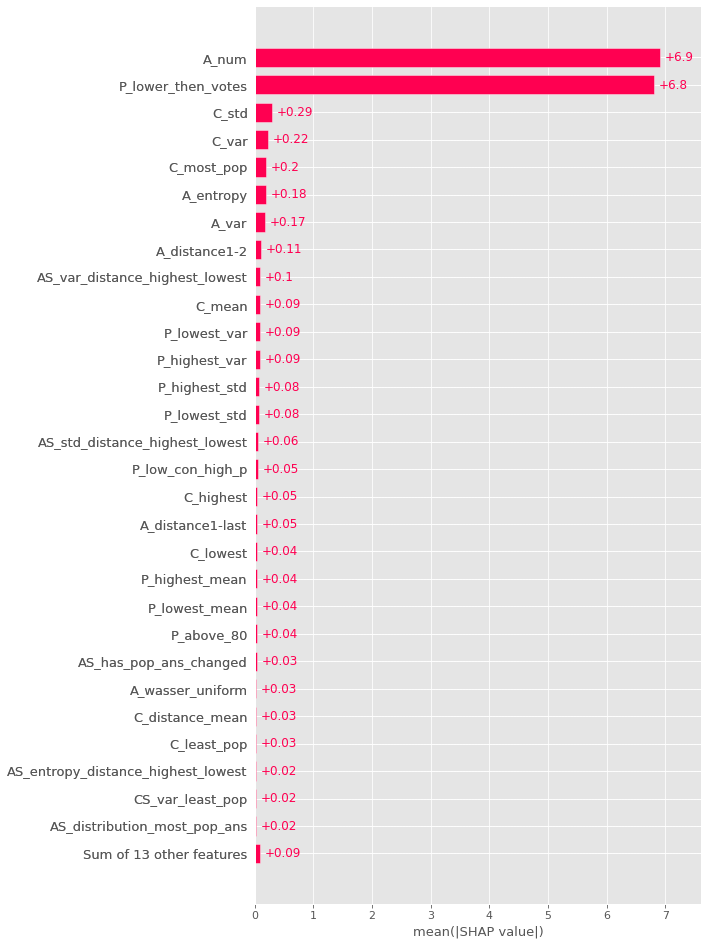

In [92]:
shap.plots.bar(shap_values, max_display=30)

In [ ]:
# https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

shap.dependence_plot("A_num", shap_values_ebm, x_test)

In [31]:
y_train['HAC']
y_train['MR']
y_train['SP']
y_train['WC']


,WC
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
851,1.0
852,0.0
853,1.0
854,1.0


## confusion matrix

In [ ]:
#confusion matrix visualization

def plot_confusion_matrix(test_Y, predict_y):
    C = confusion_matrix(test_Y, predict_y)
    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    labels = [1,2]
    cmap=sns.light_palette("#45c6c4")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    plt.subplot(1, 3, 3)
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    plt.show()

plot_confusion_matrix(y_test, rfc_predict)